<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/Tuwaiq_Academy_week_7/blob/main/Copy_of_Task2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

In [1]:
!pip install tensorflow pandas scikit-learn nltk kaggle

# Install and Import Needed Libraries

In [47]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input

# Download the Dataset

In [100]:
!kaggle datasets download -d khaledzsa/spam-messages
!unzip spam-messages.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/spam-messages
License(s): unknown
spam-messages.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  spam-messages.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

The file spam.csv might contain characters that are encoded using the ISO-8859-1 format,

# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

### Inspect the Data: Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.**bold text**

In [4]:
df.head()

,text,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [5]:
df.iloc[0]

,0
text,"Go until jurong point, crazy.. Available only ..."
label,ham


In [6]:
df.iloc[1]

,1
text,Ok lar... Joking wif u oni...
label,ham


### Check for Missing Values: Identify if there are any missing values in the dataset.

In [7]:
df.isnull().sum()

,0
text,0
label,0


In [8]:
df.columns

Index(['text', 'label'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   label   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [11]:
df['label'].describe()

,label
count,5572
unique,2
top,ham
freq,4825


In [12]:
df['text'].value_counts()

,count
text,
"Sorry, I'll call later",16
"Sorry, I'll call later https://link3.com",7
I cant pick the phone right now. Pls send a message,7
Ok...,5
"Sorry, I'll call later https://link1.com",4
...,...
U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094594 https://link2.com,1
I AM AT A PARTY WITH ALEX NICHOLS,1
This pen thing is beyond a joke. Wont a Biro do? Don't do a masters as can't do this ever again!,1


In [13]:
df['text'].describe()

,text
count,5572
unique,5389
top,"Sorry, I'll call later"
freq,16


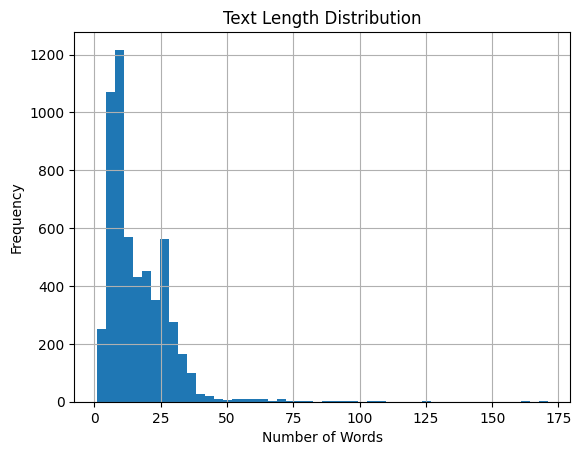

In [14]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].hist(bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

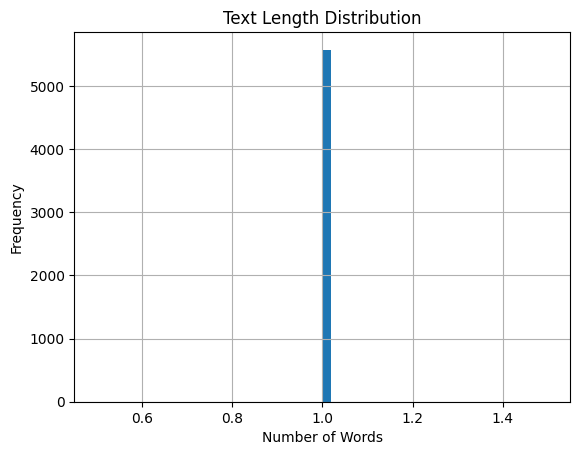

In [15]:
df['text_length'] = df['label'].apply(lambda x: len(x.split()))
df['text_length'].hist(bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [16]:
pd.set_option('display.max_colwidth', 1000) #This line is optional and helps me read long texts

In [17]:
df.sample(5)

,text,label,text_length
3008,Update_Now - 12Mths Half Price Orange line rental: 400mins...Call MobileUpd8 on 08000839402 or call2optout=J5Q https://link2.com,spam,1
5204,How come she can get it? Should b quite diff to guess rite...,ham,1
2755,We r outside already. https://link3.com,ham,1
1380,i dnt wnt to tlk wid u https://link2.com,ham,1
3031,Jokin only lar... :-) depends on which phone my father can get lor...,ham,1


In [19]:
df['label'].iloc[0].split('\t')[0]

'ham'

In [26]:
df['text'].apply(lambda x: len(x.split('\t')[0]))

,text
0,111
1,29
2,173
3,67
4,79
...,...
5567,181
5568,38
5569,75
5570,125


In [27]:
df['text'].apply(lambda x: len(x.split('\t')[0])).max()

910

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [29]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    # remove no alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [31]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [32]:
df.dropna(inplace=True)

In [33]:
print(df['cleaned_text'].head())

0                             go jurong point crazy available bugis n great world la e buffet cine got amore wat
1                                                                                        ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3                                                                            u dun say early hor u c already say
4                                                                    nah dont think goes usf lives around though
Name: cleaned_text, dtype: object


In [34]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

### LabelEncoder ,It is the best in this case *because* we want to encode the email, if it is important, with 1, and if it is not important, with “spam” with 2, and it does not matter what order they are in or in. It does not matter if the important email should be before the unimportant email in training the model. In the end, we only want to specify Email type

# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [97]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])

In [98]:
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

In [99]:
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [100]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # 0: ham, 1: spam

In [101]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)

In [102]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4457, 100)
Testing data shape: (1115, 100)


# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [103]:
model = Sequential()

In [104]:
model.add(Input(shape=(max_length,)))

In [105]:
vocab_size = 5000
embedding_dim = 64
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [106]:
model.add(Bidirectional(LSTM(64)))

In [107]:
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [108]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 100, 64)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,369 (1.50 MB)

 Trainable params: 394,369 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [110]:
batch_size = 32
epochs = 10

In [111]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.0000e+00 - loss: -112423.1094 - val_accuracy: 8.9686e-04 - val_loss: -743022.5000
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0000e+00 - loss: -1115992.0000 - val_accuracy: 8.9686e-04 - val_loss: -2479010.0000
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0000e+00 - loss: -3096073.2500 - val_accuracy: 8.9686e-04 - val_loss: -5267823.5000
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: -6245966.0000 - val_accuracy: 8.9686e-04 - val_loss: -9078279.0000
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0000e+00 - loss: -10320573.0000 - val_accuracy: 8.9686e-04 - val_loss: -13885147.0000
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0000e+00 - loss: -15246606.0000 - val_accuracy: 8.9686e-04 - val_loss: -19625852.0000
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0000e+00 - loss: -2137326

The results that appeared to me the first time are considered very bad. Now I have to look for a solution. In fact, I have more than one reason currently. I want to check whether the amount of data is considered sufficient. The model that was used is known to give higher accuracy than its counterparts, and it also takes time. In training, the two challenges I face now are time and the reason for low accuracy-------

Also I will add optimizers, Adam--


adding Dropout layers to prevent overfitting or underfitting

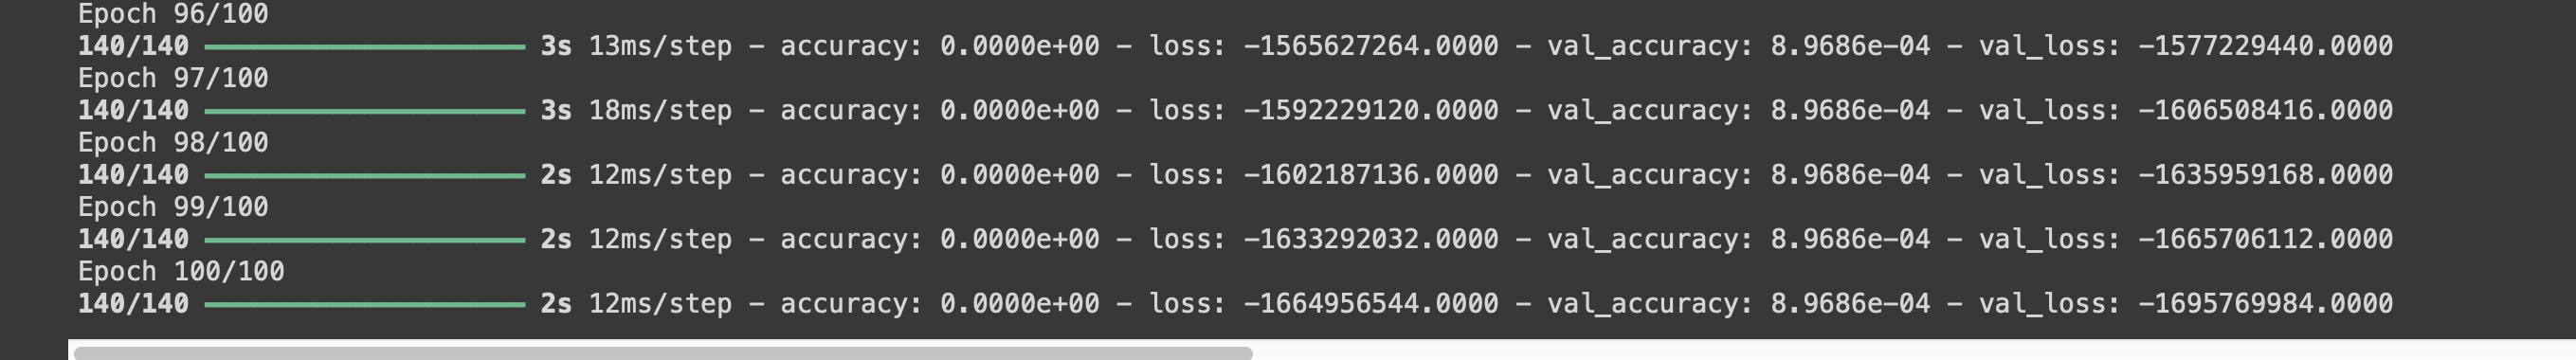

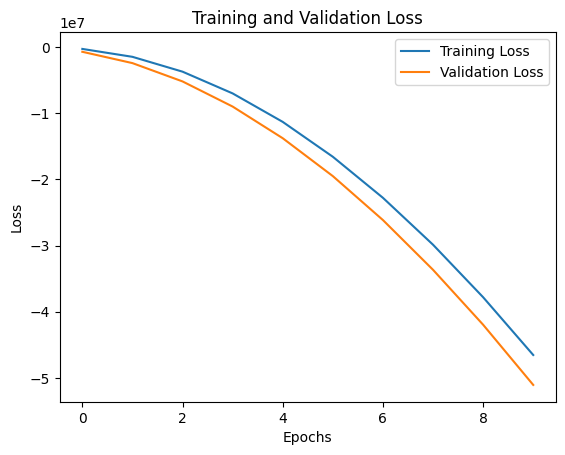

In [54]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

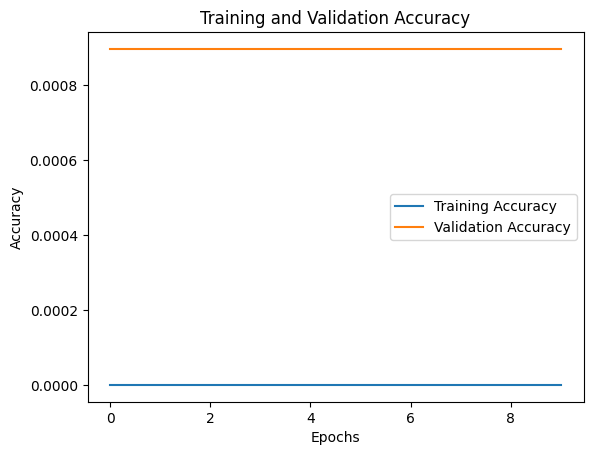

In [55]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
import tensorflow as tf

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense, Dropout


In [76]:
model = Sequential()


vocab_size = 5000
embedding_dim = 64
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(Bidirectional(SimpleRNN(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.0000e+00 - loss: -72716.4141 - val_accuracy: 8.9686e-04 - val_loss: -428224.7188
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.0000e+00 - loss: -654043.7500 - val_accuracy: 8.9686e-04 - val_loss: -1473328.6250
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 50s 303ms/step - accuracy: 0.0000e+00 - loss: -1866617.2500 - val_accuracy: 8.9686e-04 - val_loss: -3169304.5000
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 73s 236ms/step - accuracy: 0.0000e+00 - loss: -3677792.2500 - val_accuracy: 8.9686e-04 - val_loss: -5505656.0000
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 258ms/step - accuracy: 0.0000e+00 - loss: -6210941.5000 - val_accuracy: 8.9686e-04 - val_loss: -8462838.0000
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 36s 224ms/step - accuracy: 0.0000e+00 - loss: -9394610.0000 - val_accuracy: 8.9686e-04 - val_loss: -12017643.0000
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.0000e+00 - loss:

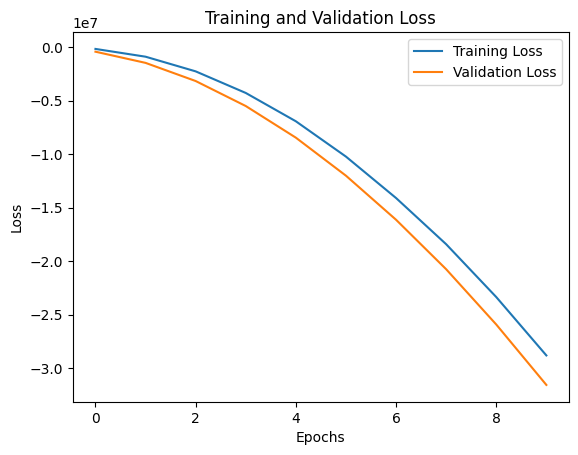

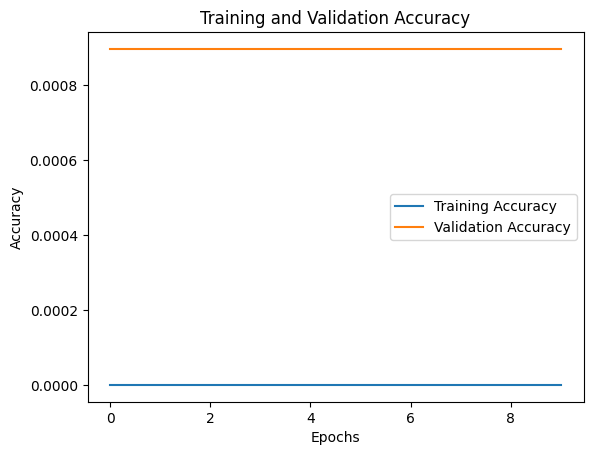

In [77]:
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [78]:
model = Sequential()

vocab_size = 20000
embedding_dim = 128
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Bidirectional(SimpleRNN(64, return_sequences=False)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.0000e+00 - loss: -77576.5391 - val_accuracy: 8.9686e-04 - val_loss: -562620.3125
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.0000e+00 - loss: -864791.4375 - val_accuracy: 8.9686e-04 - val_loss: -2029773.5000
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.0000e+00 - loss: -2617818.7500 - val_accuracy: 8.9686e-04 - val_loss: -4419868.5000
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.0000e+00 - loss: -5249491.0000 - val_accuracy: 8.9686e-04 - val_loss: -7719307.0000
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.0000e+00 - loss: -8650600.0000 - val_accuracy: 8.9686e-04 - val_loss: -11897712.0000
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0000e+00 - loss: -13174045.0000 - val_accuracy: 8.9686e-04 - val_loss: -16909606.0000
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.0000e+00 - loss: -18123434.

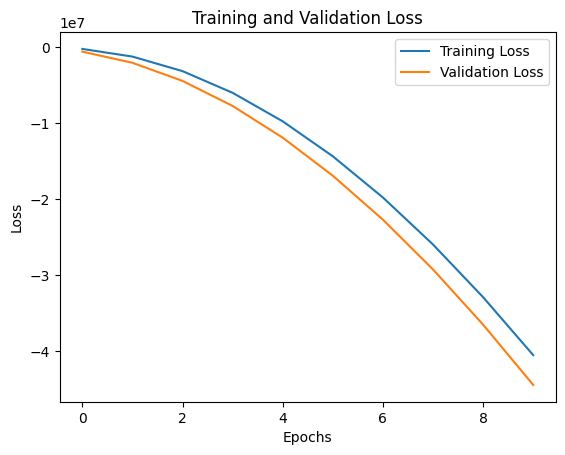

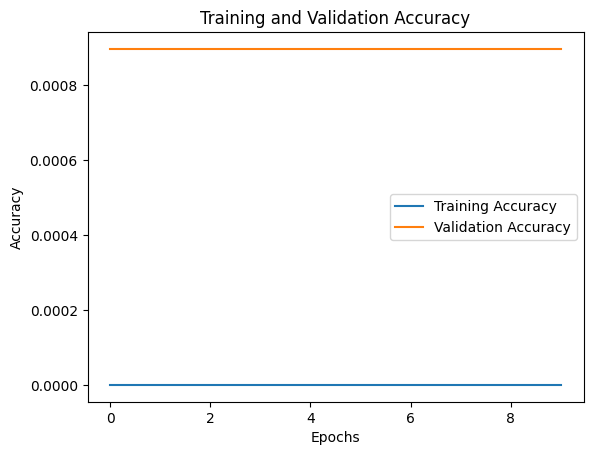

In [79]:
batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [80]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(10000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 100, 128)            │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 64)                  │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 671,041 (2.56 MB)

 Trainable params: 671,041 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.0000e+00 - loss: -47164.8672 - val_accuracy: 8.9686e-04 - val_loss: -267285.4062
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.0000e+00 - loss: -407764.7812 - val_accuracy: 8.9686e-04 - val_loss: -920650.4375
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.0000e+00 - loss: -1176164.2500 - val_accuracy: 8.9686e-04 - val_loss: -1989590.0000
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.0000e+00 - loss: -2364231.0000 - val_accuracy: 8.9686e-04 - val_loss: -3463484.2500
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.0000e+00 - loss: -3959073.5000 - val_accuracy: 8.9686e-04 - val_loss: -5325599.0000


# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

In [112]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 6.3894e-04 - loss: -50575640.0000
Test Accuracy: 0.0009


# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [115]:
new_text = "Congratulations! You have won a free lottery."
cleaned_text = clean_text(new_text)

In [116]:
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

In [117]:
prediction = model.predict(padded_sequence)
predicted_label = 'Spam' if prediction >= 0.5 else 'Ham'
print(f'The predicted class for the given text is: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The predicted class for the given text is: Spam


# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here:

How did you handle text preprocessing? Why did you choose this approach?



* Removing URLs

*   Removing Non-Alphabetic Characters
*   Lowercasing: Converted all text to lowercase to avoid case sensitivity issues.

*   Removing Stopwords: "the", "is", "and", etc.,



Why did you choose this model design?

In fact, I chose more than one model because there was a problem I faced, which I will mention in the challenges after answering all the questions.





*   My first choice was LSTM. I had worked on it before, and it was the most accurate of its kind. I mean the model specialized in series, whether time or text. All of them are considered series and must be parsed in a linear manner that ensures that the previous result is saved to build the new result on.His results were not satisfactory, based on my simple experience. He always achieved the best results and took a longer time.


*   After that, I created a model using two models, which are SimpleRNN and LSTM. I was sure that this structure of the model would be stronger because merging the two would provide me with a greater analysis of the data. As we know, text analysis takes a lot of time, effort, and a central processing unit.




*   After that, I used SimpleRNN alone
*   After that, I built a model using TensorFlow and Keras libraries. The model is a type of recurrent neural network (RNN) with Bidirectional SimpleRNN layers.



Why did you pick this number of layers or units for the model?


To be precise in answering this question, there was no specific number. In the beginning, we start with the lowest number and then increase the number of layers until we reach the number that gives us the highest accuracy. As for me, like Asmaa, I had an initial idea from the practical experience that was available to me last week, and I applied the number of layers. Accordingly, my research was that I started with one in every model. After that, I added and then deleted some layers with “model.add(Dropout(0.5))"

Why did you select these evaluation methods?



1.   Accuracy is the ratio of correctly predicted observations to the total observations. It measures the number of predictions that the model made correctly out of all the predictions. Although they were bad here, they are the most appropriate in this type of task and tasks.



*   Binary entropy (as a loss function):
Definition: Binary entropy, also known as log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. It is calculated as the negative log likelihood of the true labels given the predicted probabilities.

# **In** the future, I might try F1-score: it is the most stable standard



## The binary_crossentropy function is usually used in binary classification tasks, in our case into important or non-important email.

Does your model show signs of overfitting or underfitting? How do you know?


Low training accuracy, it is mean underfittiing :(

What changes could you make to improve the model and fix overfitting or underfitting?

I have a huge opportunity for change in this mission, and I have many beautiful challenges faced, which highlight where I need to learn more.

### I had this problem because I did not specify the input layer in the beginning.**bold text** **bold text**


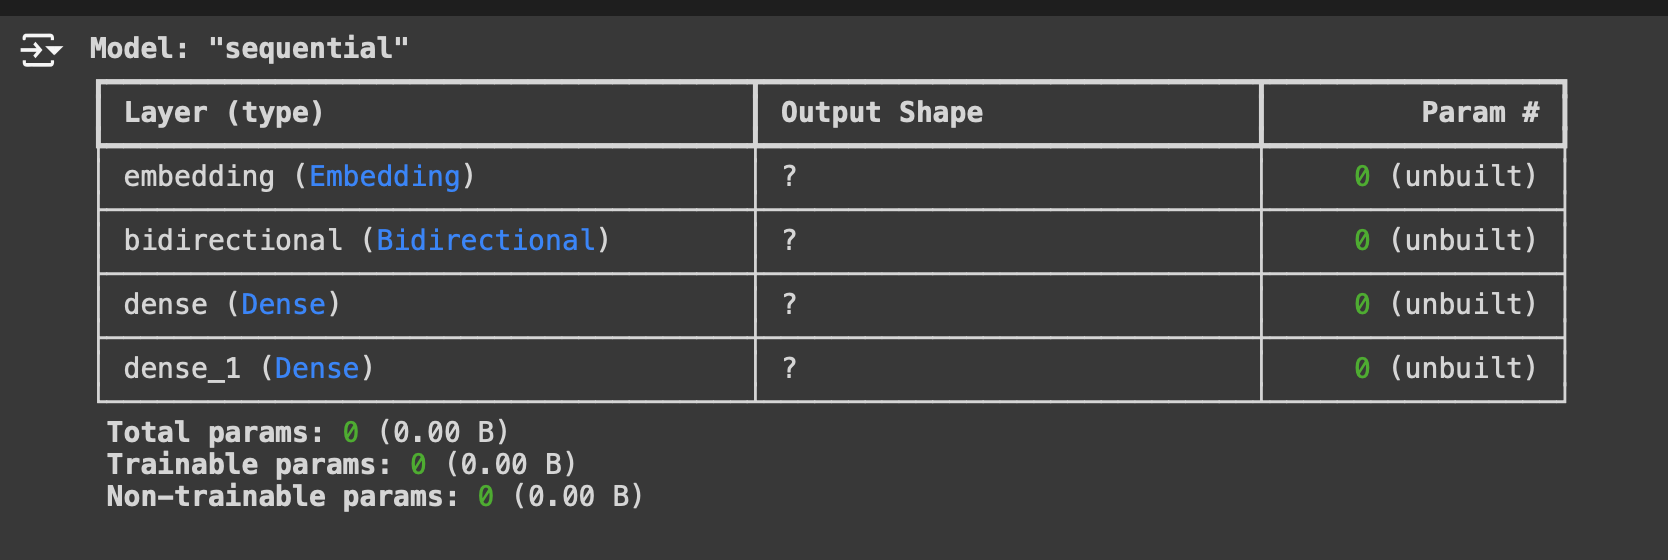

I remember that Dr. Hassan told us that if the model appears like this, it means that the input layer has not been determined.I fixed this minor bug by specifying the input layer

Bad accuracy. The reason here may be the number of training laps (epochs)in the mall, but I once tried to put it at 100 and there was no difference.


I took a good look at the data set as well. It is not considered bad, although the verification or testing phase was successful, but the accuracy is considered very bad.

I had a relatively similar problem that I solved by adding Adam. As an optimization function

But in this case, it was not a good choice


I will submit the test due to the limited time remaining, but I will definitely return to it to find out what mistake I made. I am interested in knowing it in order to avoid this defect in my professional life and in order to build my experience.



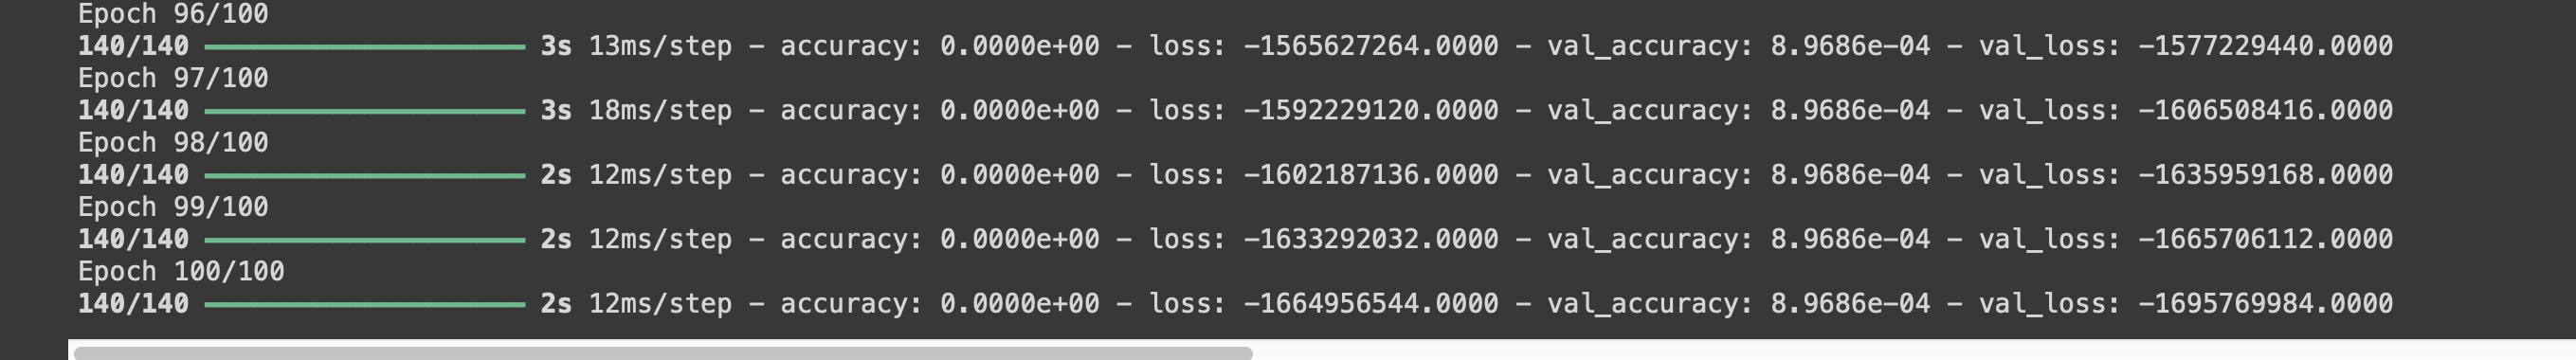

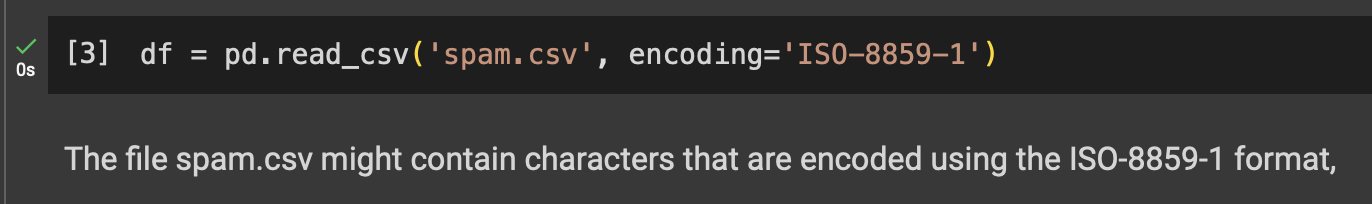

# The results were not really satisfactory, and for the limits of time it is possible that in the future, if this task is directed to me, I will search for the most famous data sets that contain the largest possible number of emails classified as important or unimportant. After that, I will review previous research and previous projects that The same task was undertaken to determine the trends of experts in this field

## In fact, I spent a lot of time trying to improve accuracy, but I think there is a fundamental problem that requires more time to find out, or consult experts, and also read research on this problem.